In [3]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import dlib #   !pip install dlib
from imutils import face_utils


In [1]:
# Kết nối đến Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/test_openCV'
# Hiển thị tất cả thư mục hoặc file
os.listdir(path)

['image_100.jpg',
 'image_120.jpg',
 'image_140.jpg',
 'image_160.jpg',
 'image_180.jpg',
 'image_200.jpg',
 'image_220.jpg',
 'image_240.jpg',
 'image_260.jpg',
 'image_300.jpg',
 'image_280.jpg',
 'image_320.jpg',
 'image_360.jpg',
 'image_340.jpg',
 'image_380.jpg',
 'image_400.jpg',
 'image_420.jpg',
 'image_440.jpg',
 'image_460.jpg',
 'image_480.jpg',
 'image_500.jpg',
 'image_540.jpg',
 'image_520.jpg',
 'image_560.jpg',
 'image_580.jpg',
 'image_600.jpg',
 'image_620.jpg',
 'image_640.jpg',
 'image_660.jpg',
 'image_680.jpg',
 'image_720.jpg',
 'image_700.jpg',
 'image_740.jpg',
 'image_760.jpg',
 'image_780.jpg',
 'image_800.jpg',
 'image_840.jpg',
 'image_820.jpg',
 'image_860.jpg',
 'image_880.jpg',
 'image_900.jpg',
 'image_920.jpg',
 'image_940.jpg',
 'image_960.jpg',
 'image_980.jpg',
 'image_1000.jpg',
 'image_1020.jpg',
 'image_1040.jpg',
 'image_1080.jpg',
 'image_1060.jpg',
 'image_1100.jpg',
 'image_1140.jpg',
 'image_1120.jpg',
 'image_1160.jpg',
 'image_1200.jpg',


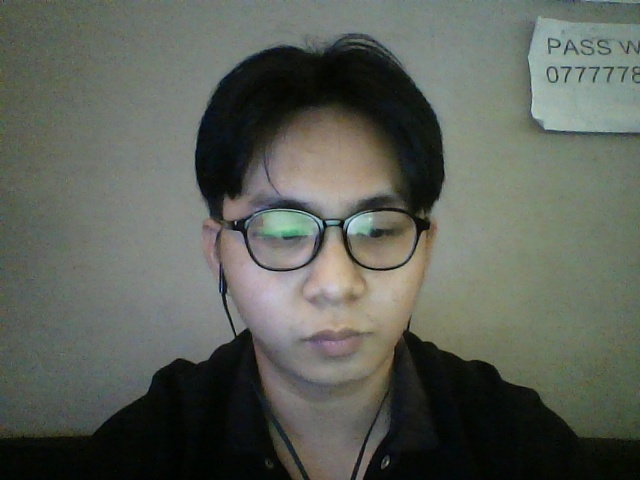

In [5]:
# Hiển thị một ảnh
img = cv2.imread(path + "/image_1200.jpg")
cv2_imshow(img)

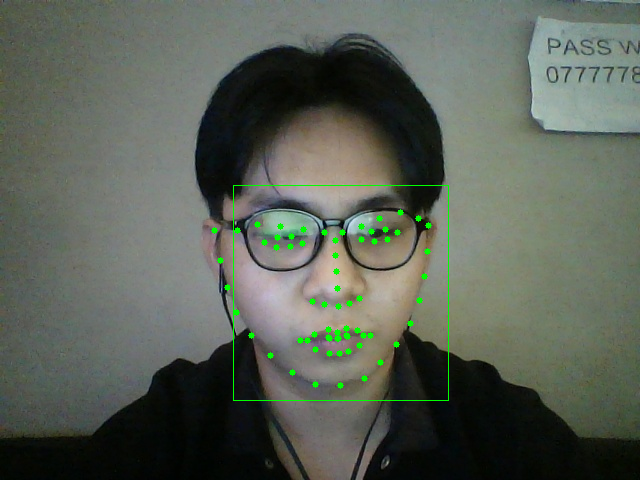

In [6]:
face_landmarks_model_path = path+ "/models/shape_predictor_68_face_landmarks.dat"
face_recognition_model_path = path+ "/models/dlib_face_recognition_resnet_model_v1.dat"
img_path = path+  "/image_1200.jpg"

# Tạo bộ nhận diện khuôn mặt
face_detector = dlib.get_frontal_face_detector()

# ĐỌc hình ảnh và phát hiện khuôn mặt
img = cv2.imread(img_path)

# Nhận diện các khuôn mặt bên trong ảnh
faces = face_detector(img)

# Vòng lặp qua từng khuôm mặt
for face in faces:
    point_a = face.left(), face.top()
    point_b = face.right(), face.bottom()

    # Phát hiện ra các điểm đặc trưng trên khuôn mặt
    shape_predictor = dlib.shape_predictor(face_landmarks_model_path)
    face_shape = shape_predictor(img, face)
    face_shape_array = face_utils.shape_to_np(face_shape)

    # Tính toán đặc trưng của khuôn mặt
    shape_descriptor = dlib.face_recognition_model_v1(face_recognition_model_path)
    face_descriptors = shape_descriptor.compute_face_descriptor(img, face_shape)
    # print(face_descriptors)

    # Vẽ hình chữ nhật và các điểm đặc trưng lên hình ảnh
    cv2.rectangle(img, point_a, point_b, (0,255,0))
    for point in face_shape_array:
        cv2.circle(img, tuple(point), 3, (0, 255, 0), -1)

cv2_imshow(img)